# Loading Libraries

In [87]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


from collections import OrderedDict
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [88]:
# Loading Data
df = pd.read_csv("samples_amh_gmsl2100.csv") 

In [89]:
df.head()

,alpha,Teq,S0,rho,sigma,GMSL_RCP26,GMSL_RCP45,GMSL_RCP60,GMSL_RCP85
0,3.234466,-0.340141,-114.245170,-0.603309,0.672624,375.736556,518.967916,519.782609,699.832482
1,3.230888,0.151142,-103.032013,-0.158155,0.784486,148.618458,285.039572,294.002254,482.326356
2,3.908396,-1.580817,-97.580041,0.577561,0.385130,1242.559141,1381.496524,1359.663385,1630.607996
3,2.792252,-1.299567,-144.681197,0.531402,0.238997,693.671811,802.133768,783.647967,960.935110
4,4.536339,-0.591635,-101.041352,0.574255,2.384607,782.672486,955.370133,939.219995,1200.575447


In [90]:
df.isnull().sum()

alpha         0
Teq           0
S0            0
rho           0
sigma         0
GMSL_RCP26    0
GMSL_RCP45    0
GMSL_RCP60    0
GMSL_RCP85    0
dtype: int64

In [91]:
# Extraction features and the response columns from the data
X = df.iloc[:, :5].astype('float64')
y1 = df[['GMSL_RCP26']]
y2 = df[['GMSL_RCP85']]

In [92]:
# Extracting Feature names
feature_names = X.columns

# For RCP2.6

In [93]:
# Splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y1, test_size=0.3, random_state=10)

In [94]:
# Standardizing the data.
scaler = StandardScaler().fit(X_train[feature_names]) 

X_train[feature_names] = scaler.transform(X_train[feature_names])
X_test[feature_names] = scaler.transform(X_test[feature_names])

In [95]:
# Creating test and train sets
df_train = y_train.join(X_train)
df_test = y_test.join(X_test)

In [96]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [97]:
# Defining the model
rfg=RandomForestRegressor(random_state=42)

In [98]:
# Defining hyperparameters
param_grid = { 
            "n_estimators"      : [50,100,200],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "max_depth": [5, 10, 20],
            "bootstrap": [True, False],
            }

In [99]:
# Fitting the model
CV_rfg = GridSearchCV(estimator=rfg, param_grid=param_grid, cv= 5)
CV_rfg.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False], 'max_depth': [5, 10, 20],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 4, 8],
                         'n_estimators': [50, 100, 200]})

In [100]:
# Getting the best parameters
CV_rfg.best_params_

{'bootstrap': True,
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 100}

In [101]:
# Fitting the model with the best parameters
rfg1 = RandomForestRegressor(random_state=42, bootstrap=True, max_features='auto', min_samples_split = 2, 
n_estimators= 100, max_depth=10)

In [102]:
# Calculating MSE
rfg1.fit(X_train, y_train)
pred=rfg1.predict(X_train)
pred_test=rfg1.predict(X_test)
print("MSE for Random Forest on CV train data: ", mean_squared_error(y_train, pred))
print("MSE for Random Forest on test data: ", mean_squared_error(y_test, pred_test))

MSE for Random Forest on CV train data:  165.19114053890152
MSE for Random Forest on test data:  980.6548893306954


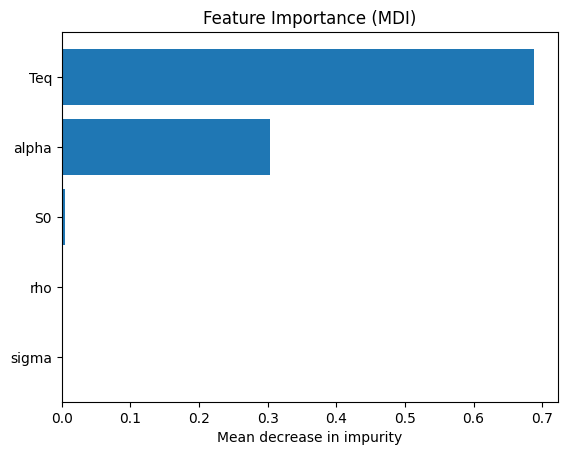

In [103]:
# Obtaining feature importance
feature_importance = rfg1.feature_importances_

# Sorting features according to importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0])

# Plotting feature importances
plt.barh(pos, feature_importance[sorted_idx], align="center")

plt.yticks(pos, np.array(feature_names)[sorted_idx])
plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");


# RCP 8.6


In [104]:
# Splitting the data
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y2, test_size=0.3, random_state=10)
scaler = StandardScaler().fit(X_train1[feature_names]) 
X_train1[feature_names] = scaler.transform(X_train1[feature_names])
X_test1[feature_names] = scaler.transform(X_test1[feature_names])
df_train1 = y_train1.join(X_train1)
df_test1 = y_test1.join(X_test1)
y_train1 = np.ravel(y_train1)
y_test1 = np.ravel(y_test1)

In [105]:
# Defining hyperparameters and fitting the model

reg=RandomForestRegressor(random_state=42)
param_grid1 = { 
            "n_estimators"      : [100, 200, 300],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "max_depth": [10, 20, 30],
            "bootstrap": [True, False],
            }

CV_reg = GridSearchCV(estimator=reg, param_grid=param_grid1, cv= 5)
CV_reg.fit(X_train1, y_train1)

# Getting the best parameters

CV_reg.best_params_




{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'auto',
 'min_samples_split': 2,
 'n_estimators': 200}

MSE for Random Forest on CV train data:  188.66043953885435
MSE for Random Forest on test data:  1282.352029893634


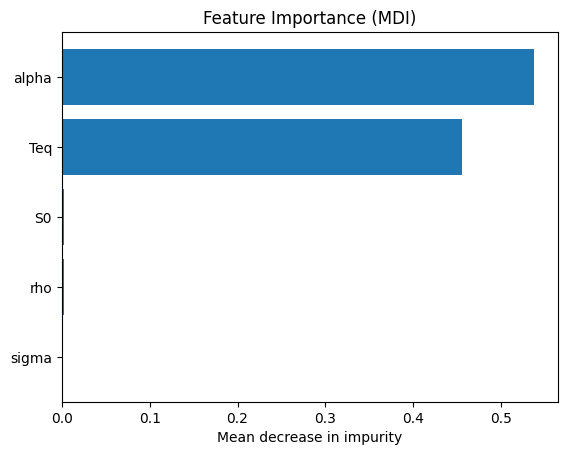

In [106]:
# Fitting the model with the best parameters

reg1 = RandomForestRegressor(random_state=42, bootstrap=True, max_features='auto', min_samples_split = 2, 
n_estimators= 200, max_depth=20)
reg1.fit(X_train1, y_train1)
pred1=reg1.predict(X_train1)
pred1_test=reg1.predict(X_test1)

# Calculating MSE

print("MSE for Random Forest on CV train data: ", mean_squared_error(y_train1, pred1))
print("MSE for Random Forest on test data: ", mean_squared_error(y_test1, pred1_test))


# Obtaining feature importance
feature_importance1 = reg1.feature_importances_

# Sorting features according to importance
sorted_idx1 = np.argsort(feature_importance1)
pos1 = np.arange(sorted_idx1.shape[0])

# Plotting feature importances
plt.barh(pos1, feature_importance1[sorted_idx1], align="center")

plt.yticks(pos1, np.array(feature_names)[sorted_idx1])

plt.title("Feature Importance (MDI)")
plt.xlabel("Mean decrease in impurity");

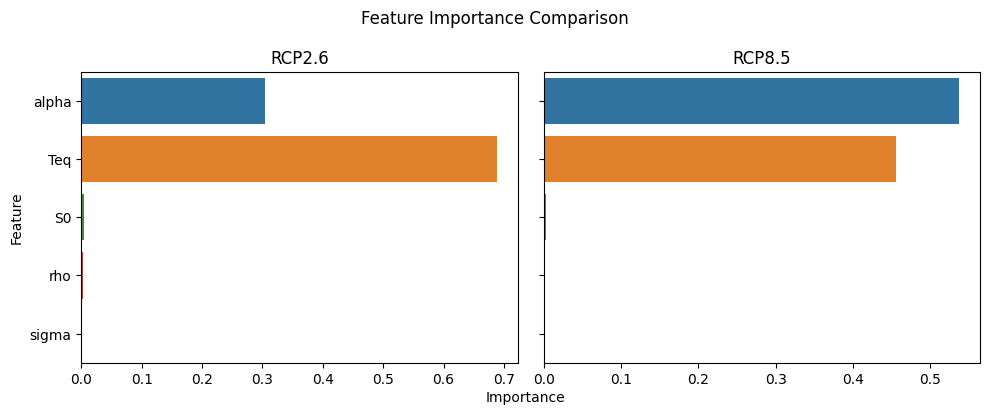

In [107]:
# Creating two subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

# Plotting feature importance
sns.barplot(x=feature_importance, y=feature_names, ax=ax1)
ax1.set_title('RCP2.6')
ax1.set_ylabel('Feature')
sns.barplot(x=feature_importance1, y=feature_names, ax=ax2)
ax2.set_title('RCP8.5')
fig.text(0.53, 0.001, 'Importance', ha='center')
fig.suptitle('Feature Importance Comparison')
fig.tight_layout()
plt.show()

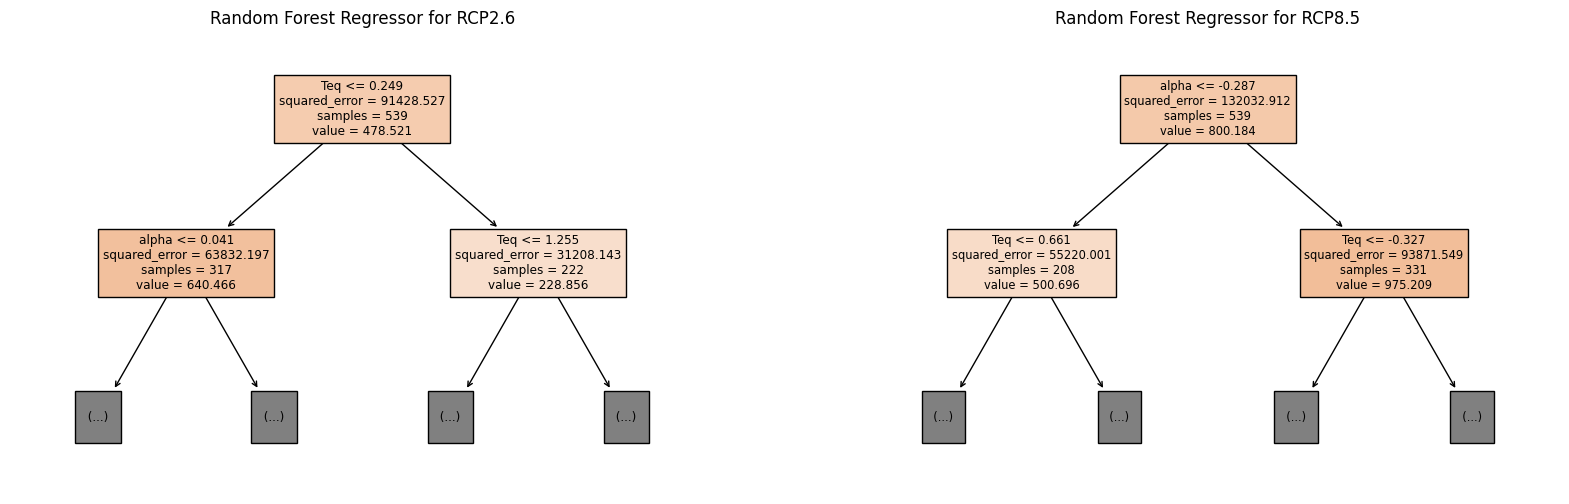

In [108]:
tree1 = rfg1.estimators_[0]
tree2 = reg1.estimators_[0]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 6))
plot_tree(tree1, max_depth = 1, filled=True, feature_names=feature_names, ax=axes[0])
axes[0].set_title('Random Forest Regressor for RCP2.6')
plot_tree(tree2, max_depth = 1, filled=True, feature_names=feature_names, ax=axes[1])
axes[1].set_title('Random Forest Regressor for RCP8.5')
plt.show()